In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import re

In [2]:
y_train = pd.read_csv('https://s3-us-west-2.amazonaws.com/pphilip-usp-inhibition/'
                      'data/y_train_postprocessing.csv')
y_test = pd.read_csv('https://s3-us-west-2.amazonaws.com/pphilip-usp-inhibition/'
                     'data/y_test_postprocessing.csv')

In [3]:
y_train.columns = ['ID', 'Activity_Score']
df_train = y_train.groupby('Activity_Score')['ID'].nunique().to_frame()
df_train['score'] = df_train.index
df_train.columns = ['score_counts', 'score']
df_train = df_train.reset_index(drop=True)

y_test.columns = ['ID', 'Activity_Score']
df_test = y_test.groupby('Activity_Score')['ID'].nunique().to_frame()
df_test['score'] = df_test.index
df_test.columns = ['score_counts', 'score']
df_test = df_test.reset_index(drop=True)

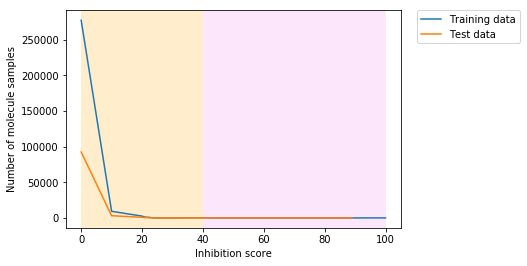

In [4]:
plt.plot(df_train['score'], df_train['score_counts'], label='Training data')
plt.plot(df_test['score'], df_test['score_counts'], label='Test data')
plt.xlabel('Inhibition score')
plt.ylabel('Number of molecule samples')
plt.axvspan(0, 40, facecolor='orange', alpha=0.2)
plt.axvspan(40, 100, facecolor='violet', alpha=0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('./plots/all_score_counts.png', bbox_inches='tight')

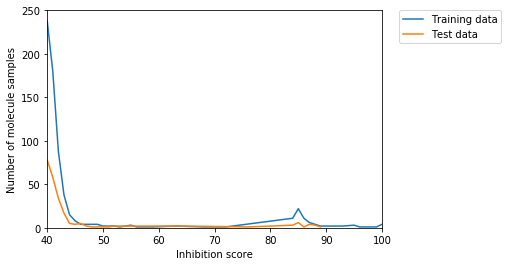

In [5]:
plt.plot(df_train['score'], df_train['score_counts'], label='Training data')
plt.plot(df_test['score'], df_test['score_counts'], label='Test data')
plt.xlabel('Inhibition score')
plt.ylabel('Number of molecule samples')
axes = plt.gca()
axes.set_xlim([40, 100])
axes.set_ylim([0, 250])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('./plots/high_score_counts.png', bbox_inches='tight')

668.0
232.0


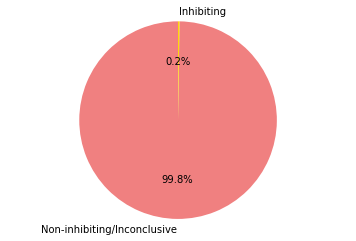

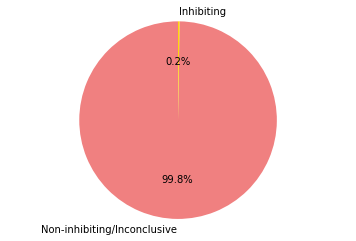

In [5]:
yes = 0
no = 0
for index, row in df_train.iterrows():
    if row['score'] >39:
        yes += row['score_counts']
    else:
        no += row['score_counts']
df_train_yes = yes/(yes+no)*100
print yes
df_train_no = no/(yes+no)*100

yes = 0
no = 0
for index, row in df_test.iterrows():
    if row['score'] >39:
        yes += row['score_counts']
    else:
        no += row['score_counts']
df_test_yes = yes/(yes+no)*100
print yes
df_test_no = no/(yes+no)*100

labels = 'Non-inhibiting/Inconclusive', 'Inhibiting'
sizes = [df_train_no, df_train_yes]
colors=['lightcoral', 'gold']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('./plots/train_score_counts_pie.png', bbox_inches='tight')

labels = 'Non-inhibiting/Inconclusive', 'Inhibiting'
sizes = [df_test_no, df_test_yes]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors=['lightcoral', 'gold']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', colors=colors,startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('./plots/test_score_counts_pie.png', bbox_inches='tight')

In [ ]:
n_features = 50
x_train = pd.read_csv('https://s3-us-west-2.amazonaws.com/pphilip-usp-inhibition/'
                      'data/x_train_postprocessing_rfr_%d.csv' % n_features)
x_test = pd.read_csv('https://s3-us-west-2.amazonaws.com/pphilip-usp-inhibition/'
                     'data/x_test_postprocessing_rfr_%d.csv' % n_features)
y_train = pd.read_csv('https://s3-us-west-2.amazonaws.com/pphilip-usp-inhibition/'
                      'data/y_train_postprocessing.csv')
y_test = pd.read_csv('https://s3-us-west-2.amazonaws.com/pphilip-usp-inhibition/'
                     'data/y_test_postprocessing.csv')
x_train.drop(x_train.columns[0], axis=1, inplace=True)
x_test.drop(x_test.columns[0], axis=1, inplace=True)
y_train.drop(y_train.columns[0], axis=1, inplace=True)
y_test.drop(y_test.columns[0], axis=1, inplace=True)

In [ ]:
for column in x_train:
    plt.scatter(x_train[column], y_train, label='Training set', color='blue')
    plt.scatter(x_test[column], y_test, label='Test set', color='red')
    plt.axhspan(0, 40, facecolor='orange', alpha=0.2)
    plt.axhspan(40, 100, facecolor='violet', alpha=0.2)
    plt.title('%s effect on inhibition activity score' % x_train[column].name)
    plt.xlabel('%s' % x_train[column].name)
    plt.ylabel('Activity score')
    plt.savefig('./plots/feature_plots/%s.png' % x_train[column].name, bbox_inches='tight')

In [6]:
def plot_results():
    """
    Plots the performance metrics, comparing the different methods over the number of features used.
    :return: 
    """
    n_features = [25, 50, 75, 100, 150, 200, 250]
    mean_abs, mean_sq, median_abs, r2, exp_var_score = ({} for i in range(5))
    for n in n_features:
        with open('./trained_networks/lr_%d_data.pkl' % n, 'rb') as result:
            lr_clf = pickle.load(result)
            mean_abs["lr{0}".format(n)] = pickle.load(result)
            mean_sq["lr{0}".format(n)] = pickle.load(result)
            median_abs["lr{0}".format(n)] = pickle.load(result)
            r2["lr{0}".format(n)] = pickle.load(result)
            exp_var_score["lr{0}".format(n)] = pickle.load(result)
            lr_y_pred = pickle.load(result)

        with open('./trained_networks/nn_%d_data.pkl' % n, 'rb') as result:
            nn_clf = pickle.load(result)
            nn_net = pickle.load(result)
            mean_abs["nn{0}".format(n)] = pickle.load(result)
            mean_sq["nn{0}".format(n)] = pickle.load(result)
            median_abs["nn{0}".format(n)] = pickle.load(result)
            r2["nn{0}".format(n)] = pickle.load(result)
            exp_var_score["nn{0}".format(n)] = pickle.load(result)
            nn_y_pred = pickle.load(result)

        with open('./trained_networks/dt_%d_data.pkl' % n, 'rb') as result:
            dt_clf = pickle.load(result)
            mean_abs["dt{0}".format(n)] = pickle.load(result)
            mean_sq["dt{0}".format(n)] = pickle.load(result)
            median_abs["dt{0}".format(n)] = pickle.load(result)
            r2["dt{0}".format(n)] = pickle.load(result)
            exp_var_score["dt{0}".format(n)] = pickle.load(result)
            dt_y_pred = pickle.load(result)

        with open('./trained_networks/rr_%d_data.pkl' % n, 'rb') as result:
            rr_clf = pickle.load(result)
            mean_abs["rr{0}".format(n)] = pickle.load(result)
            mean_sq["rr{0}".format(n)] = pickle.load(result)
            median_abs["rr{0}".format(n)] = pickle.load(result)
            r2["rr{0}".format(n)] = pickle.load(result)
            exp_var_score["rr{0}".format(n)] = pickle.load(result)
            rr_ridge_alpha = pickle.load(result)
            rr_y_pred = pickle.load(result)

        with open('./trained_networks/brr_%d_data.pkl' % n, 'rb') as result:
            brr_clf = pickle.load(result)
            mean_abs["brr{0}".format(n)] = pickle.load(result)
            mean_sq["brr{0}".format(n)] = pickle.load(result)
            median_abs["brr{0}".format(n)] = pickle.load(result)
            r2["brr{0}".format(n)] = pickle.load(result)
            exp_var_score["brr{0}".format(n)] = pickle.load(result)
            brr_y_pred = pickle.load(result)

        with open('./trained_networks/lasso_%d_data.pkl' % n, 'rb') as result:
            lasso_clf = pickle.load(result)
            mean_abs["lasso{0}".format(n)] = pickle.load(result)
            mean_sq["lasso{0}".format(n)] = pickle.load(result)
            median_abs["lasso{0}".format(n)] = pickle.load(result)
            r2["lasso{0}".format(n)] = pickle.load(result)
            exp_var_score["lasso{0}".format(n)] = pickle.load(result)
            lasso_y_pred = pickle.load(result)
    
    return mean_abs, mean_sq, median_abs, r2, exp_var_score

In [7]:
mean_abs, mean_sq, median_abs, r2, exp_var_score = plot_results()
score_list = [mean_abs, mean_sq, median_abs, r2, exp_var_score]
lol = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)]
for i in score_list:
    lists = sorted(i.items()) # sorted by key, return a list of tuples
    for j in lol(lists, 7):
        y = [k[1] for k in j[:][:]]
        x = [100, 150, 200, 25, 250, 50, 75]
        plt.scatter(x, y)
    
    plt.show()

IOError: [Errno 2] No such file or directory: './trained_networks/nn_25_data.pkl'

In [34]:
all_scores = pd.read_csv('./data/all_feature_scores_rfr.csv')
all_scores.columns = ['feature_ranking', 'feature_score']
all_scores['cumulative_score'] = list(np.cumsum(all_scores['feature_score']))
select_scores = pd.read_csv('./data/select_feature_scores_rfr.csv')
select_scores.columns = ['feature_ranking', 'feature_score']
select_scores['cumulative_score'] = list(np.cumsum(select_scores['feature_score']))

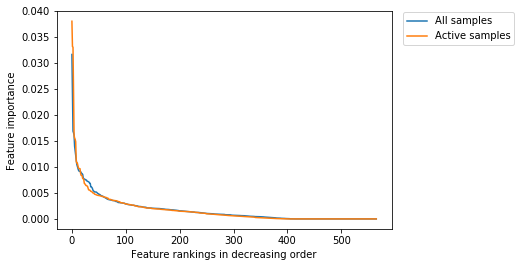

In [35]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(all_scores['feature_ranking'], all_scores['feature_score'], label='All samples')
ax.plot(select_scores['feature_ranking'], select_scores['feature_score'], label='Active samples')
plt.xlabel('Feature rankings in decreasing order')
plt.ylabel('Feature importance')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.20, 1.02), ncol=1)
plt.savefig('./plots/rfr_feature_importance_ranking.png', bbox_inches='tight')

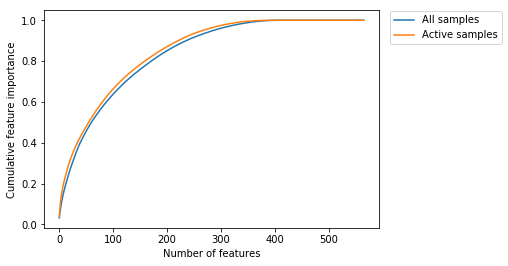

In [36]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(all_scores['feature_ranking'], all_scores['cumulative_score'], label='All samples')
ax.plot(select_scores['feature_ranking'], select_scores['cumulative_score'], label='Active samples')
plt.xlabel('Number of features')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.20, 1.02), ncol=1)
plt.ylabel('Cumulative feature importance')
plt.savefig('./plots/rfr_feature_cumulative_importance.png', bbox_inches='tight')